Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Sample Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0    

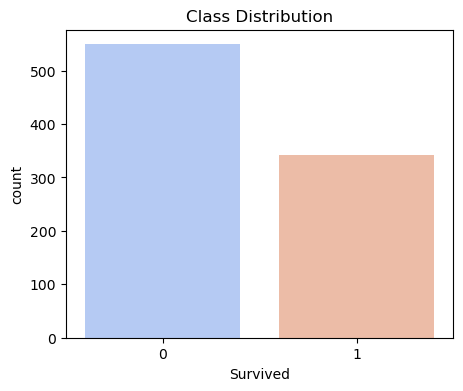

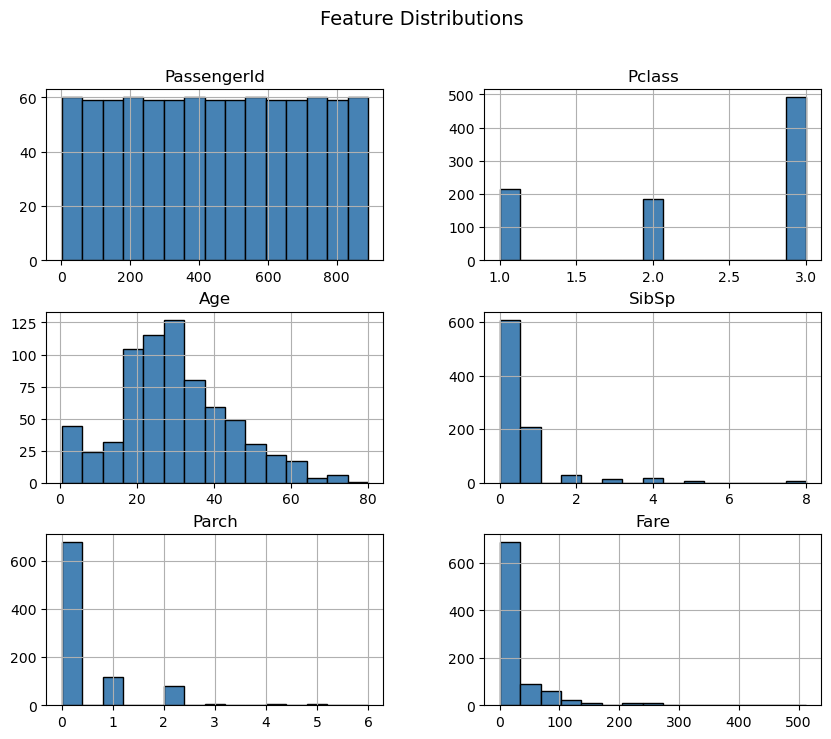

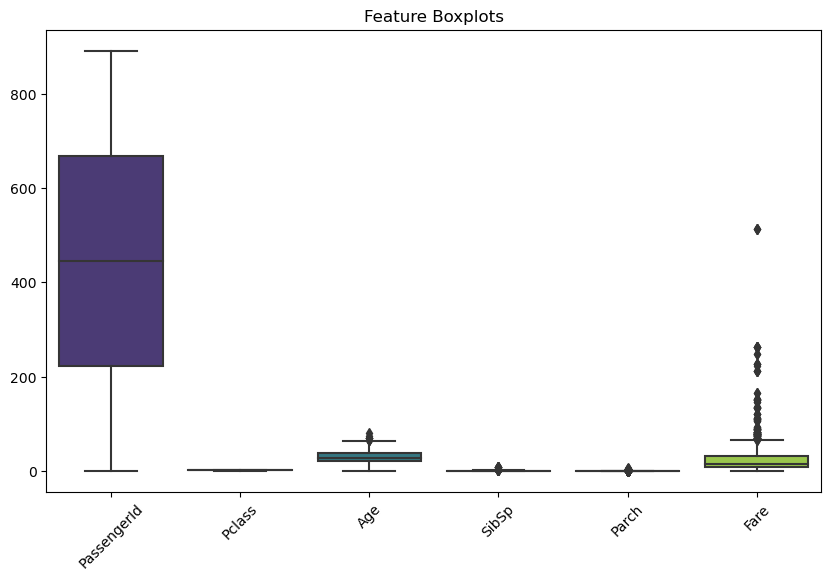

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


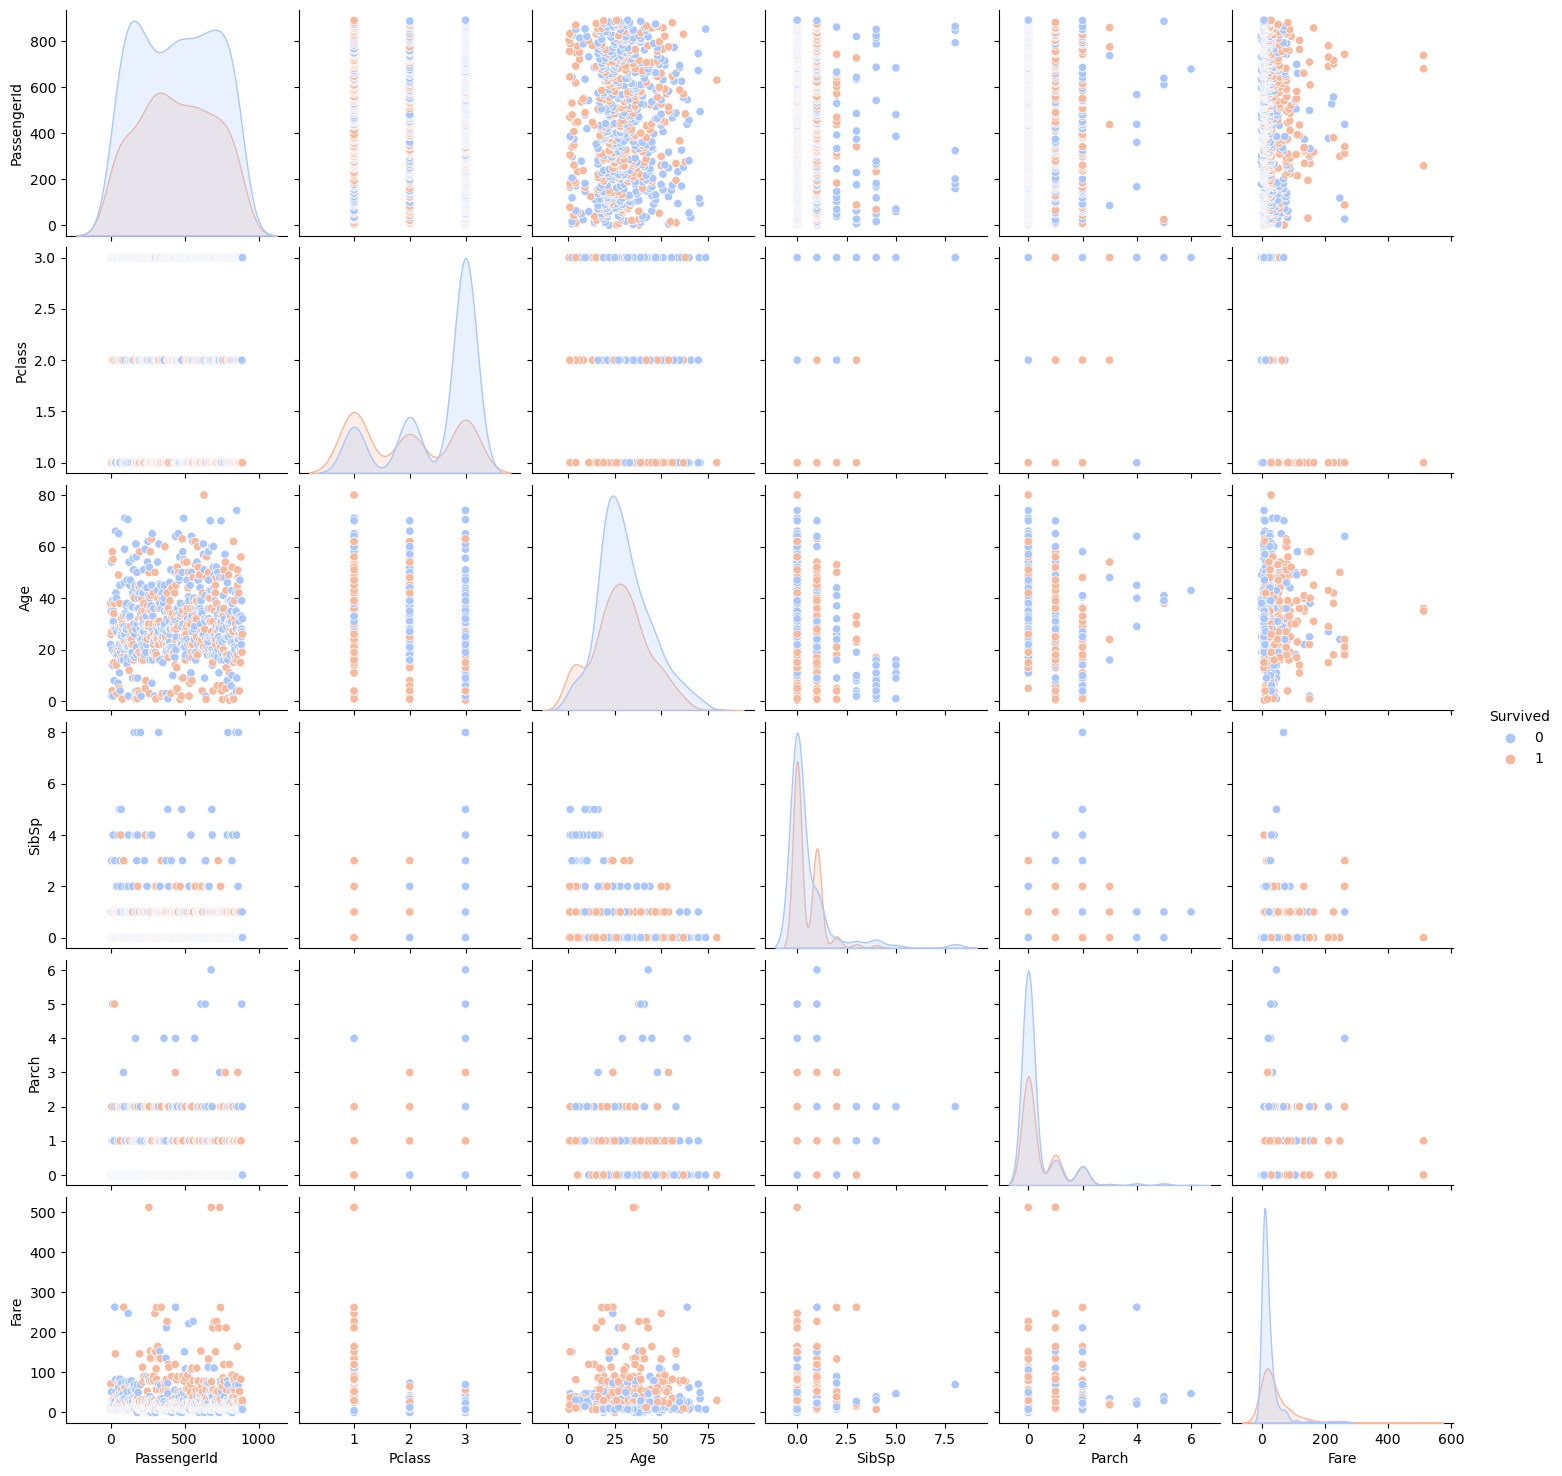

C:\Users\Owner\AppData\Local\Temp\ipykernel_36624\3033285306.py:53: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


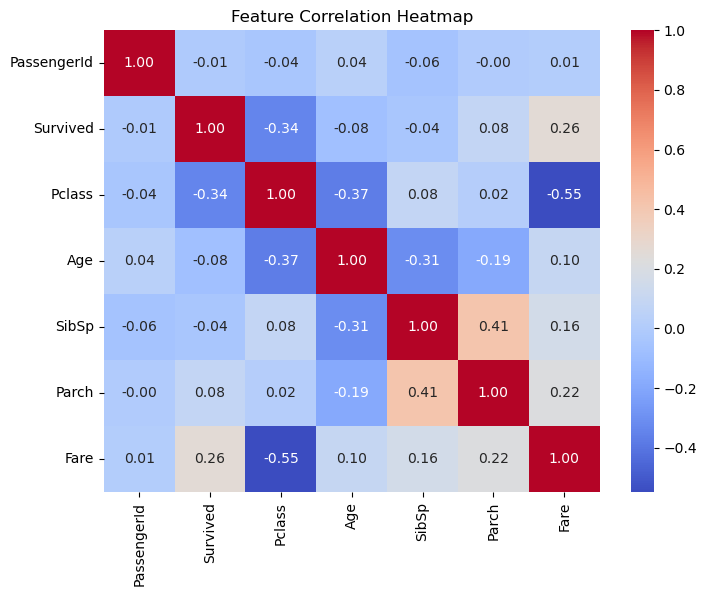


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



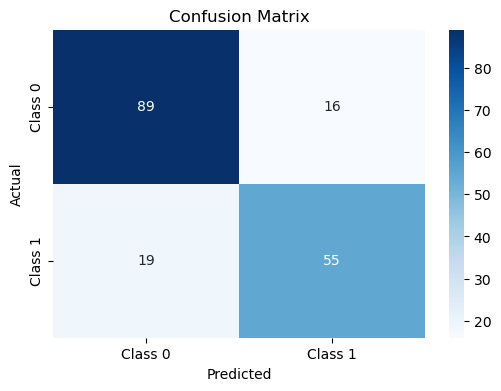

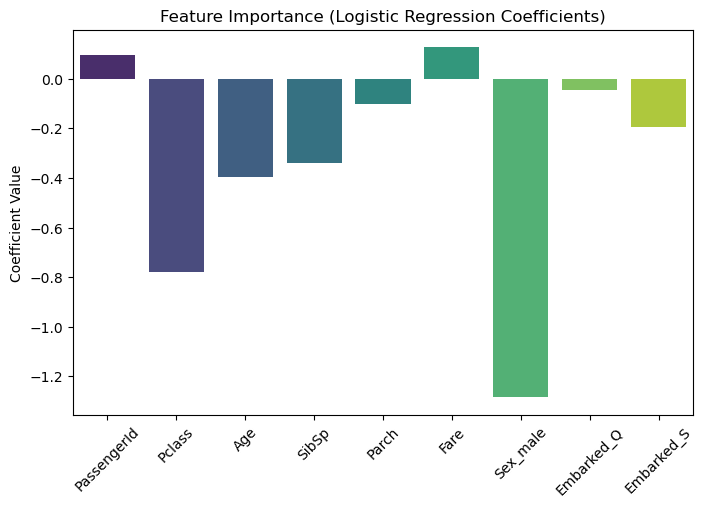

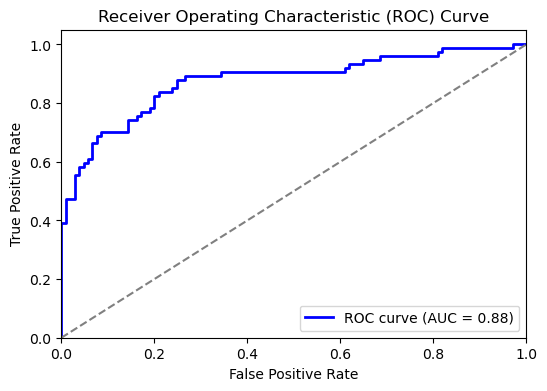

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load Dataset
df = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\SVM\XGBM\Titanic_train.csv")

# Dataset Summary
print("Dataset Summary:")
print(df.info())

# Sample Data
print("\nSample Data:")
print(df.head())

# Feature Statistics
print("\nFeature Statistics:")
print(df.describe())

# Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Class Distribution
plt.figure(figsize=(5, 4))
sns.countplot(x=df["Survived"], palette='coolwarm')
plt.title("Class Distribution")
plt.show()

# Distribution of Features
df.drop(columns=['Survived']).hist(figsize=(10, 8), bins=15, color='steelblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Boxplots to Check for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Survived']), palette='viridis')
plt.xticks(rotation=45)
plt.title("Feature Boxplots")
plt.show()

# Pairplot for Feature Relationships
sns.pairplot(df, hue='Survived', palette='coolwarm')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Preprocessing
# Dropping non-numeric columns
df = df.drop(columns=["Name", "Ticket", "Cabin"], errors='ignore')

# Encoding categorical variables
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Handling missing values
df.fillna(df.median(), inplace=True)

# Splitting Data
X = df.drop(columns=["Survived"])
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC curve

# Model Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance (Logistic Regression Coefficients)
importance = model.coef_[0]
plt.figure(figsize=(8, 5))
sns.barplot(x=X.columns, y=importance, palette="viridis")
plt.xticks(rotation=45)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()